<IPython.core.display.Javascript object>


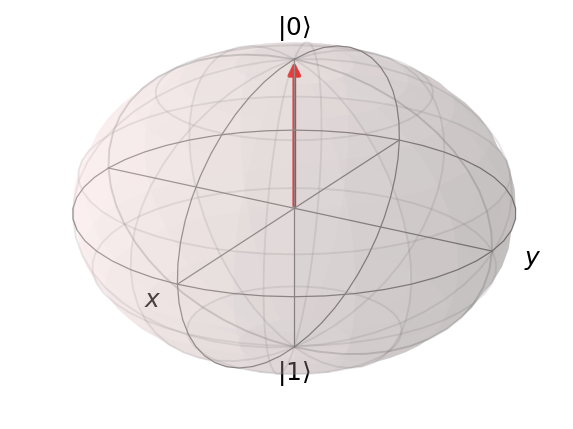

In [5]:
%matplotlib notebook

import numpy as np
import qutip as q
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from mpl_toolkits.mplot3d import Axes3D

up = q.basis(2, 0)
sx = q.sigmax()
sy = q.sigmay()
sz = q.sigmaz()
bz = 0
by = 0
bx = 20
w = np.pi / 20
H = w * (sx * bx + sy * by + sz * bz)

fig = plt.figure()
ax = Axes3D(fig)
sphere = q.Bloch(axes=ax)
sphere.add_states(up)

def state(t):
    states = [q.Qobj.expm(-(0 + 1j) * H * t) * up]
    return states

def ini():
    sphere.vector_color=("r")
    return ax

t = np.linspace(0, 1, 50)

def animate(i):
    sphere.clear()
    states = state(i)
    sphere.add_states(states)
    sphere.make_sphere()
    return ax

ani = ani.FuncAnimation(fig, animate, frames=t, init_func=ini, repeat=False)

plt.show() 